In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

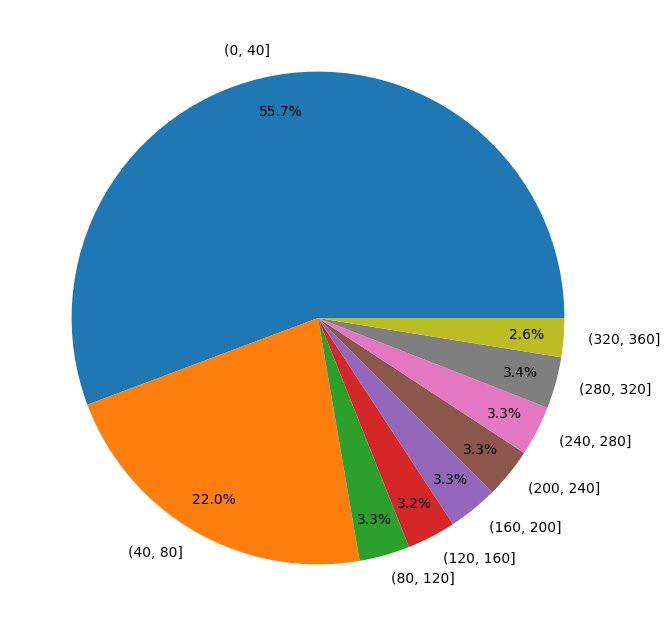

In [221]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df_copy = df
bins = np.arange(0, df_copy["salary K$"].max() + 40, 40)
salary_groups = df_copy.groupby(pd.cut(df["salary K$"], bins), observed=False).size()

plt.figure(figsize=(8, 8))
salary_groups.plot(kind="pie", autopct="%1.1f%%", pctdistance=0.85)

plt.show()


# Task 1
Print the count of men and women in the dataset.

In [211]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [212]:
male_filter = df[df["sex"] == "Male"]
avg_age = male_filter["age"].mean().round().astype("int8")
print("Men average age:", avg_age)

Men average age: 39


# Task 3
Get the percentage of people from Poland (native-country)

In [213]:
poland_filter = df[df["native-country"] == "Poland"]
except_poland_filter = df[df["native-country"] != "Poland"]

from_poland = poland_filter["native-country"].shape[0]
outside_poland = except_poland_filter["native-country"].shape[0]

percentage_from_poland = round(from_poland / df.shape[0] * 100, 2)
print(f"There are {from_poland} people from Poland. It is {percentage_from_poland}%.")

There are 56 people from Poland. It is 0.19%.


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [222]:
def mean_std_salary(dataframe, salary_value):
    sal_filter = dataframe[dataframe["salary"] == salary_value]
    mean_age_salary = sal_filter["age"].mean().round().astype("int8")
    std_age_salary = sal_filter["age"].std().round().astype("int8")
    return mean_age_salary, std_age_salary

big_mean, big_std = mean_std_salary(df, ">50K")
small_mean, small_std = mean_std_salary(df, "<=50K")

print("Mean age for people who earn >50K:", big_mean)
print("Standard deviation of age for people who earn >50K:", big_std)
print("Mean age for people who earn <=50K:", small_mean)
print("Standard deviation of age for people who earn <=50K:", small_std)


Mean age for people who earn >50K: 44
Standard deviation of age for people who earn >50K: 10
Mean age for people who earn <=50K: 37
Standard deviation of age for people who earn <=50K: 13


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [215]:
hed_filter = df[
    ~df["education"].isin(
    ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
    )
]
salary_filter = hed_filter[hed_filter["salary"] == ">50K"]
print(f"Number of people without higher education who earn >50K: {salary_filter.shape[0]}")

Number of people without higher education who earn >50K: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [216]:
df_copy2 = df
grouped = df_copy2.groupby("education")["age"].describe()
grouped

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

Married earn more.


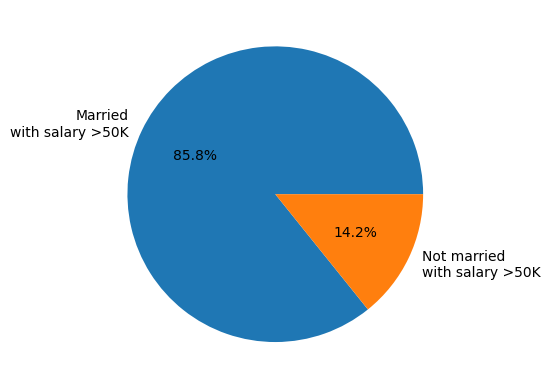

In [217]:
married = df[df["marital-status"].str.startswith("Married")]
not_married = df[~df["marital-status"].str.startswith("Married")]
rich_married = married[married["salary"] == ">50K"].shape[0]
rich_not_married = not_married[not_married["salary"] == ">50K"].shape[0]

labels = ["Married\nwith salary >50K", "Not married\nwith salary >50K"]
sizes = [rich_married, rich_not_married]
_, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%")

print(
    "Married earn more." 
    if rich_married > rich_not_married 
    else "Not married earn more."
)



# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [218]:
random_id = randint(0, len(df))
rand_item = df.iloc[random_id]
hpw = rand_item["hours-per-week"]
count_the_same_hpw = df[df["hours-per-week"] == hpw].shape[0]

print(f"The person with id #{random_id} works {hpw} hours per week.")
print(f"{count_the_same_hpw} people work {hpw} hours per week.")


The person with id #14184 works 40 hours per week.
14251 people work 40 hours per week.


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

                     age  hours-per-week  salary K$
age             1.000000        0.101599   0.208203
hours-per-week  0.101599        1.000000   0.196378
salary K$       0.208203        0.196378   1.000000


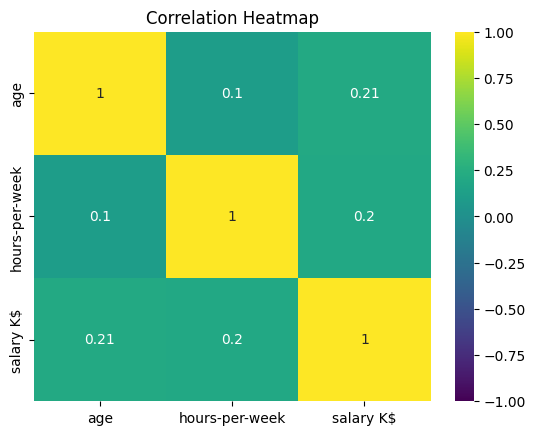

In [219]:
num_values = df.select_dtypes(include=["number"])
mask = ~num_values.columns.str.contains("Unnamed")
no_index = num_values.loc[:, mask]
corr_matrix = no_index.corr()
print(corr_matrix)

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="viridis", center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()